# Exercise 5.4 Intro to Data Mining

## Contents:

    0. Import Libraries

    1. Loading and Checking the Data

    2. Cleaning the Data

    3. Separating the Data

    4. Descriptive Statistics

    5. Comparison Analysis

    6. Creating the Decision Tree

    7. Exporting the Datasets

# 0. Import Libraries

In [73]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# 1. Loading and Checking the Data

In [74]:
# Define the path to the data files
path = '/Users/aaronkibler/CF - Ach 5'

In [75]:
# Load the Pig E Bank client data as "df_pig"
df_pig = pd.read_excel(os.path.join(path, 'Data', '5.4-PigEBank-Client-Data set.xlsx'))

In [76]:
# Checking the Pig E Bank client data is correctly loaded
print(df_pig.head())
print(df_pig.info())
df_pig.shape

   Row_Number  Customer_ID Last_Name  Credit Score Country  Gender   Age  \
0           1     15634602  Hargrave         619.0  France  Female  42.0   
1           2     15647311      Hill         608.0   Spain  Female  41.0   
2           3     15619304      Onio         502.0  France  Female  42.0   
3           4     15701354      Boni         699.0  France  Female  39.0   
4           5     15737888  Mitchell         850.0   Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard?  IsActiveMember  \
0       2       0.00              1           1               1   
1       1   83807.86              1           0               1   
2       8  159660.80              3           1               0   
3       1       0.00              2           0               0   
4       2  125510.82              1           1               1   

   Estimated Salary  ExitedFromBank?  
0         101348.88                1  
1         112542.58                0  
2         113931.57    

(991, 14)

# 2. Cleaning the Data

### Begin with data exploration, then proceed with data cleaning steps.

In [77]:
# Check basic statistics of the dataset
df_pig.describe()

,Row_Number,Customer_ID,Credit Score,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?
count,991.00000,9.910000e+02,988.000000,990.000000,991.000000,991.000000,991.000000,991.000000,991.000000,989.000000,991.000000
mean,496.00000,1.569232e+07,648.512146,38.684848,5.066599,78002.718063,1.522704,0.706357,0.507568,98574.543013,0.205853
std,286.22136,7.223333e+04,98.202853,10.958220,2.928371,62799.237345,0.573170,0.455660,0.500195,57224.716446,0.404527
min,1.00000,1.556609e+07,376.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,371.050000,0.000000
25%,248.50000,1.563019e+07,579.750000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,48559.190000,0.000000
50%,496.00000,1.569275e+07,653.500000,37.000000,5.000000,98668.180000,1.000000,1.000000,1.000000,98368.240000,0.000000
75%,743.50000,1.575379e+07,721.000000,44.000000,8.000000,129461.850000,2.000000,1.000000,1.000000,146326.450000,0.000000
max,991.00000,1.581536e+07,850.000000,82.000000,10.000000,213146.200000,4.000000,1.000000,1.000000,199725.390000,1.000000


### From the basic stats, it looks like some identifier columns will need to transformed into strings. It also looks like there's probably some missing values in "Credit Score", "Age", and "Estimated Salary". The min "Age" is 2, which could be an error depending on the context. The max "Age" is 82, which is within reason.

### Now I will take a closer look at the different variables by plotting histograms, box plots, and frequency counts.

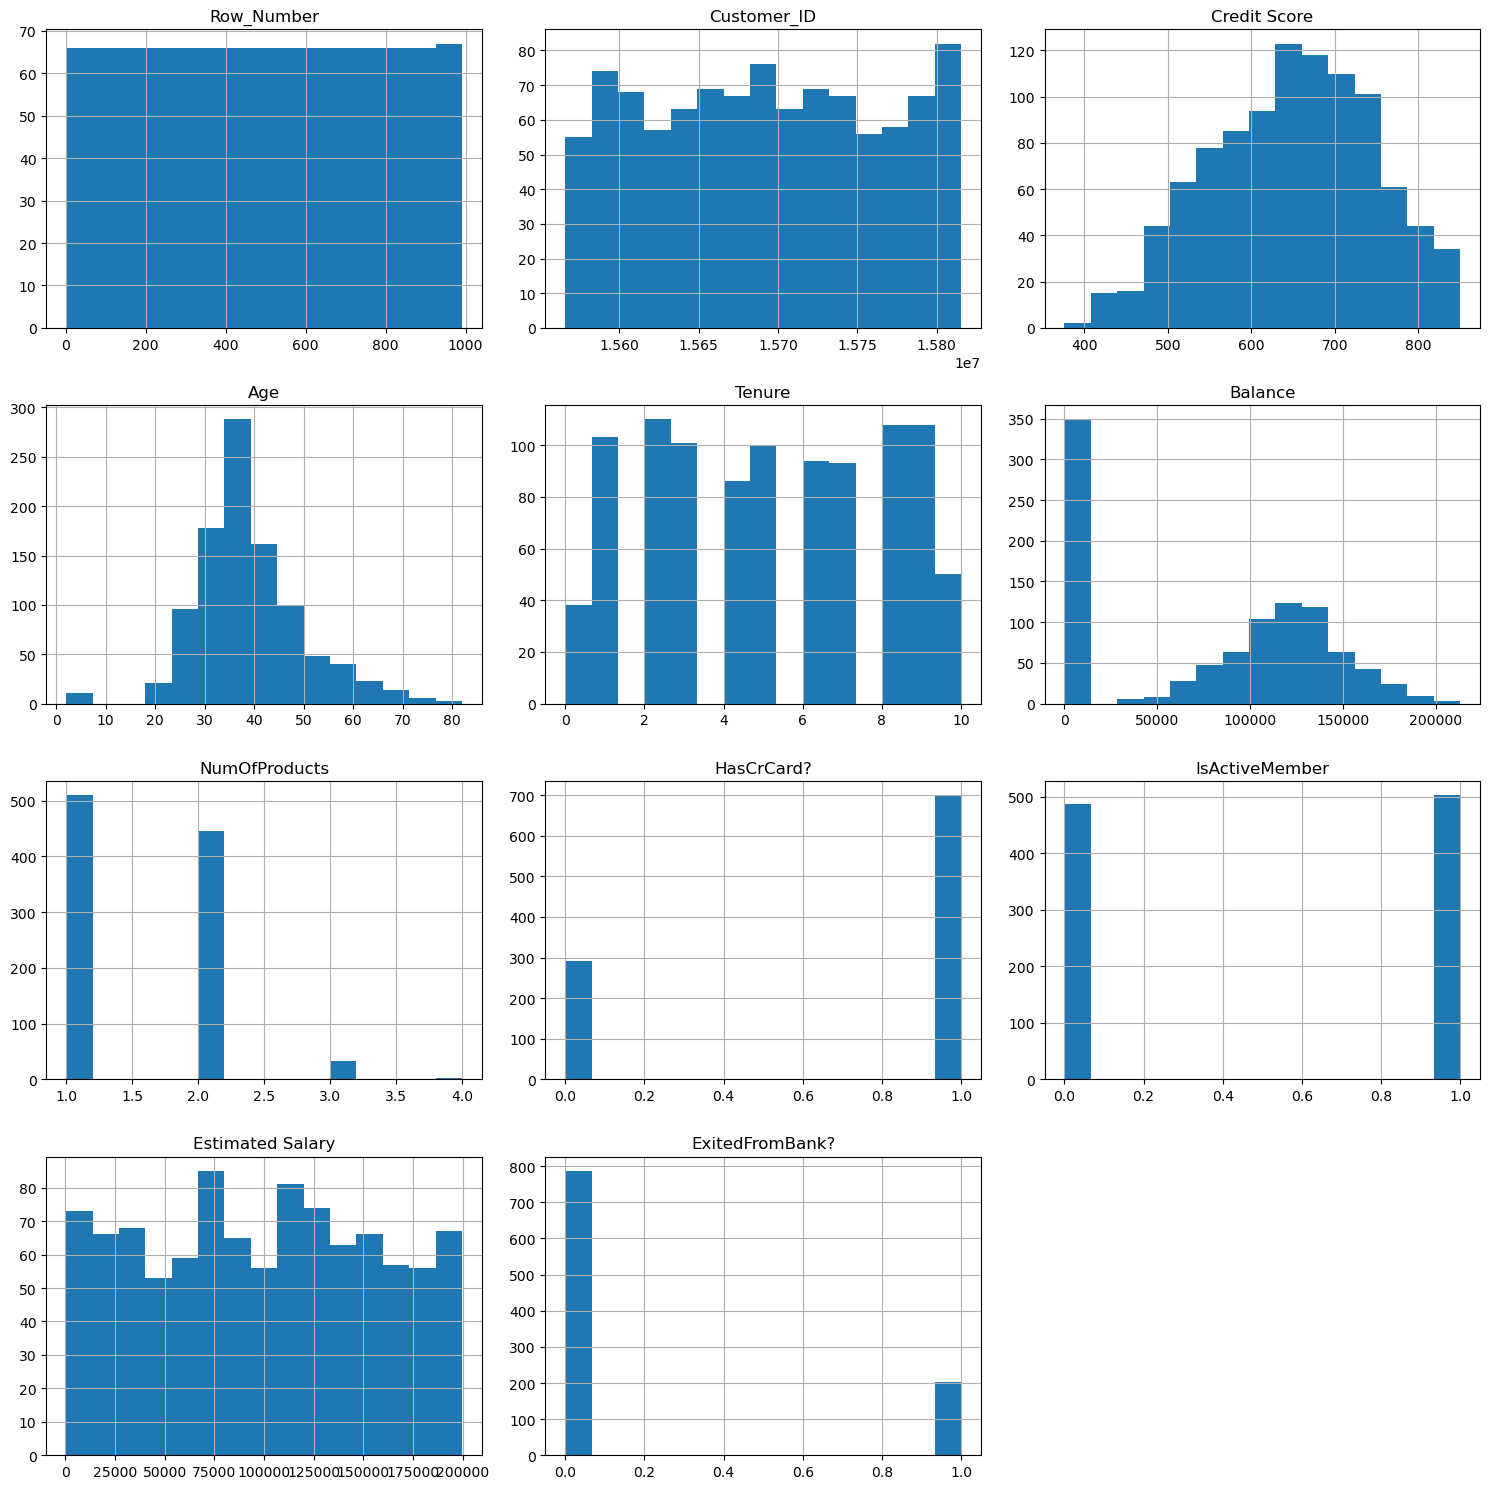

In [78]:
# Plot histograms for all numeric columns
df_pig.hist(bins=15, figsize=(15, 15), layout=(4, 3))  # Adjusted to 4 rows and 3 columns
plt.tight_layout()
plt.show()

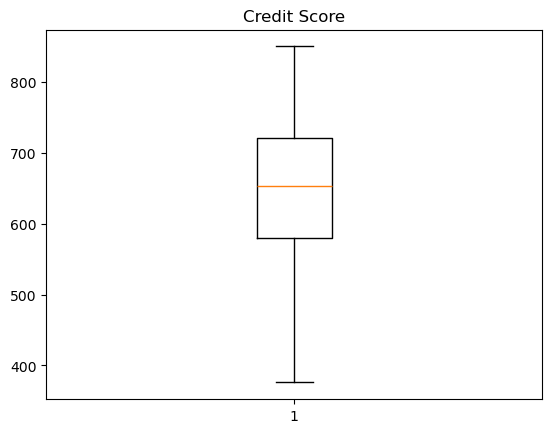

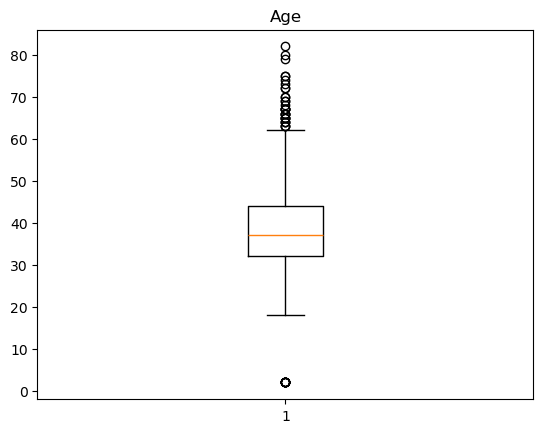

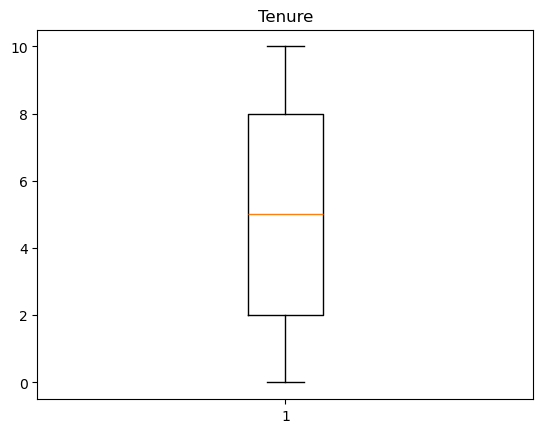

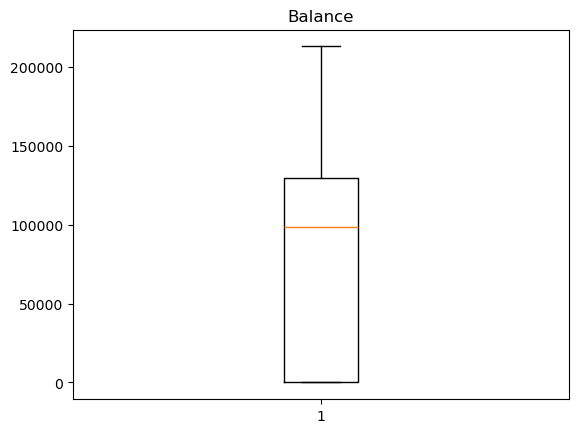

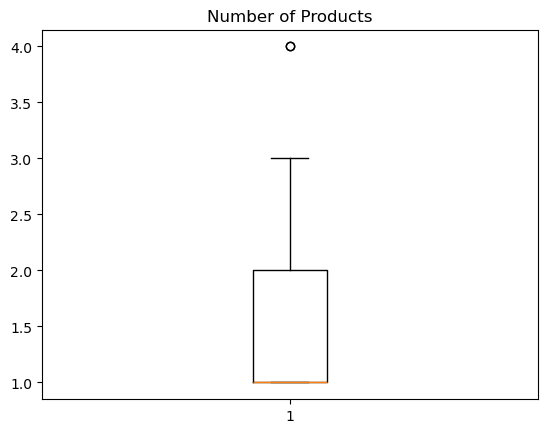

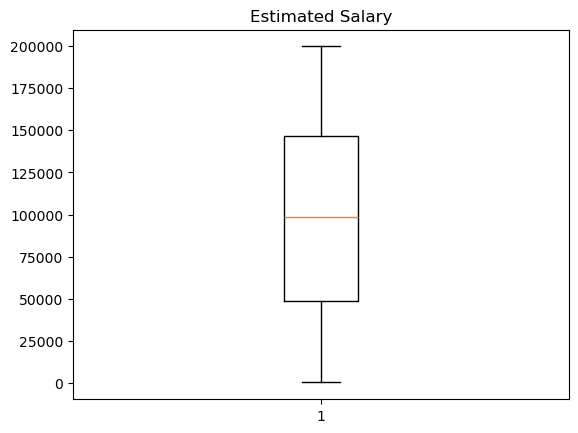

In [79]:
# Creating box plots for the continuous variables:
plt.boxplot(df_pig['Credit Score'].dropna())
plt.title('Credit Score')
plt.show()

plt.boxplot(df_pig['Age'].dropna())
plt.title('Age')
plt.show()

plt.boxplot(df_pig['Tenure'].dropna())
plt.title('Tenure')
plt.show()

plt.boxplot(df_pig['Balance'].dropna())
plt.title('Balance')
plt.show()

plt.boxplot(df_pig['NumOfProducts'].dropna())
plt.title('Number of Products')
plt.show()

plt.boxplot(df_pig['Estimated Salary'].dropna())
plt.title('Estimated Salary')
plt.show()

In [80]:
# Perform frequency counts on the categorical variables ("Country" and "Gender")
print(df_pig['Country'].value_counts())
print(df_pig['Gender'].value_counts())

Country
FR         244
France     236
Germany    234
Spain      136
ES         118
DE          23
Name: count, dtype: int64
Gender
Male      479
Female    443
M          49
F          19
Name: count, dtype: int64


### It looks like the categorical variables will need to have some standardization performed during the cleaning process.

## Check for missing values

In [81]:
# Check the data for missing values
df_pig.isnull().sum()

Row_Number          0
Customer_ID         0
Last_Name           1
Credit Score        3
Country             0
Gender              1
Age                 1
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard?          0
IsActiveMember      0
Estimated Salary    2
ExitedFromBank?     0
dtype: int64

### Last_Name: 1 missing value
### Credit Score: 3 missing values
### Gender: 1 missing value
### Age: 1 missing value
### Estimated Salary: 2 missing values

### To address the missing value in "Last_Name", simply drop the entire column, as this is PII and not necessary for the analysis.

In [82]:
# Drop the "Last_Name" column
df_pig.drop(columns=['Last_Name'], inplace=True)

In [83]:
# Verify the column is dropped
print(df_pig.head())

   Row_Number  Customer_ID  Credit Score Country  Gender   Age  Tenure  \
0           1     15634602         619.0  France  Female  42.0       2   
1           2     15647311         608.0   Spain  Female  41.0       1   
2           3     15619304         502.0  France  Female  42.0       8   
3           4     15701354         699.0  France  Female  39.0       1   
4           5     15737888         850.0   Spain  Female  43.0       2   

     Balance  NumOfProducts  HasCrCard?  IsActiveMember  Estimated Salary  \
0       0.00              1           1               1         101348.88   
1   83807.86              1           0               1         112542.58   
2  159660.80              3           1               0         113931.57   
3       0.00              2           0               0          93826.63   
4  125510.82              1           1               1          79084.10   

   ExitedFromBank?  
0                1  
1                0  
2                1  
3       

### To address the missing values in the "Credit Score" column, first look at the histogram and box plot above. The distribution appears roughly symmetric and the box plot does not show outliers. Therefore, I will use the mean to impute the missing values in the column.

In [84]:
# Impute the missing values in the "Credit Score" column using the column mean
df_pig['Credit Score'].fillna((df_pig['Credit Score'].mean()), inplace=True)

In [85]:
# Verify that there are no more missing values in the "Credit Score" column
df_pig['Credit Score'].isnull().sum()

0

### To address the missing value in "Gender", let's first standardize the entries to "Male" and "Female", then recheck for missing values and if necessary impute the missing value with the mode of the column.

In [86]:
# Standardize "Gender" names
df_pig['Gender'] = df_pig['Gender'].replace({'M': 'Male', 'F': 'Female'})

In [87]:
# Verify the results of the change
print(df_pig['Gender'].value_counts())

Gender
Male      528
Female    462
Name: count, dtype: int64


In [88]:
# Recheck for missing values in "Gender"
df_pig['Gender'].isnull().sum()

1

In [89]:
# Impute the missing value with the mode of the column
df_pig['Gender'].fillna((df_pig['Gender'].mode()[0]), inplace=True)

In [90]:
# Verify that there are no more missing values in the "Gender" column
df_pig['Gender'].isnull().sum()

0

### For the missing value in the "Age" column, the distribution appears relatively normal, but the box plot shows a significant number of outliers. It might be safer in this case to impute the missing value with the median of the column.

In [91]:
# Impute the missing value in the "Age" column with the column median
df_pig['Age'].fillna((df_pig['Age'].median()), inplace=True)

In [92]:
# Verify that there are no more missing values in the "Age" column
df_pig['Age'].isnull().sum()

0

### For the missing values in the "Estimated Salary" column, the distribution appears relatively uniform and the box plot does not show any outliers, so I will impute the missing values with the mean of the column.

In [93]:
# Impute the missing values in the "Estimated Salary" column using the column mean
df_pig['Estimated Salary'].fillna((df_pig['Estimated Salary'].mean()), inplace=True)

In [94]:
# Verify that there are no more missing values in the "Estimated Salary" column
df_pig['Estimated Salary'].isnull().sum()

0

In [95]:
# Recheck the whole dataframe again for missing values
df_pig.isnull().sum()

Row_Number          0
Customer_ID         0
Credit Score        0
Country             0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard?          0
IsActiveMember      0
Estimated Salary    0
ExitedFromBank?     0
dtype: int64

## Check for duplicates, mixed-type data, and data transformations

In [96]:
# Check for duplicate rows in the dataset
df_pig.duplicated().sum()

0

In [97]:
# Check for any mixed-type columns
for col in df_pig.columns.tolist():
    weird = (df_pig[[col]].map(type) != df_pig[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_pig[weird]) > 0:
        print (f"Mixed-type data found in column: {col}")
    else: print(f"No mixed-type data in column: {col}")

No mixed-type data in column: Row_Number
No mixed-type data in column: Customer_ID
No mixed-type data in column: Credit Score
No mixed-type data in column: Country
No mixed-type data in column: Gender
No mixed-type data in column: Age
No mixed-type data in column: Tenure
No mixed-type data in column: Balance
No mixed-type data in column: NumOfProducts
No mixed-type data in column: HasCrCard?
No mixed-type data in column: IsActiveMember
No mixed-type data in column: Estimated Salary
No mixed-type data in column: ExitedFromBank?


In [98]:
# Check the data-types of the dataframe
print(df_pig.dtypes)

Row_Number            int64
Customer_ID           int64
Credit Score        float64
Country              object
Gender               object
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard?            int64
IsActiveMember        int64
Estimated Salary    float64
ExitedFromBank?       int64
dtype: object


In [99]:
# Change the data-types of identifier columns ("Row_Number", "Customer_ID") to strings
df_pig[['Row_Number', 'Customer_ID']] = df_pig[['Row_Number', 'Customer_ID']].astype('str')

In [100]:
# Verify the changes made to the data-type
print(df_pig.dtypes)

Row_Number           object
Customer_ID          object
Credit Score        float64
Country              object
Gender               object
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard?            int64
IsActiveMember        int64
Estimated Salary    float64
ExitedFromBank?       int64
dtype: object


## Addressing errors and inconsistencies

### Check the data for inconsistencies by reviewing the unique values of categorical columns and the basic statistics of continuous variables.

In [101]:
# Unique values for categorical columns
unique_pig = {col: df_pig[col].unique() for col in ['Country', 'Gender', 'HasCrCard?', 'IsActiveMember', 'ExitedFromBank?']}
unique_pig

{'Country': array(['France', 'Spain', 'Germany', 'FR', 'ES', 'DE'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'HasCrCard?': array([1, 0]),
 'IsActiveMember': array([1, 0]),
 'ExitedFromBank?': array([1, 0])}

In [102]:
# Statistical summaries for numerical columns
stats_pig = df_pig[['Credit Score', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'Estimated Salary']].describe()
stats_pig

,Credit Score,Age,Tenure,Balance,NumOfProducts,Estimated Salary
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,648.512146,38.683148,5.066599,78002.718063,1.522704,98574.543013
std,98.053948,10.952815,2.928371,62799.237345,0.573170,57166.884479
min,376.000000,2.000000,0.000000,0.000000,1.000000,371.050000
25%,580.000000,32.000000,2.000000,0.000000,1.000000,48642.435000
50%,653.000000,37.000000,5.000000,98668.180000,1.000000,98453.450000
75%,721.000000,44.000000,8.000000,129461.850000,2.000000,146236.190000
max,850.000000,82.000000,10.000000,213146.200000,4.000000,199725.390000


### "Country" contains inconsistencies. Abbreviations (FR, ES, DE) should be changed to full country names.
### "Age" has a minimum value of 2, which could represent an error and needs further investigation.

In [103]:
# Standardize "Country" names
df_pig['Country'] = df_pig['Country'].replace({'FR': 'France', 'ES': 'Spain', 'DE': 'Germany'})

In [104]:
# Verify the results of the change
updated_unique_pig = {col: df_pig[col].unique() for col in ['Country']}
updated_unique_pig

{'Country': array(['France', 'Spain', 'Germany'], dtype=object)}

In [105]:
# Take a closer look at the rows with "Age" = 2
pig_age_two = df_pig[df_pig['Age'] == 2]
pig_age_two

,Row_Number,Customer_ID,Credit Score,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?
624,625,15745307,477.0,Spain,Female,2.0,2,129120.64,1,0,1,26475.79,0
629,630,15692463,799.0,Spain,Female,2.0,3,142253.65,1,1,0,45042.56,0
632,633,15718673,839.0,Spain,Female,2.0,10,75592.43,1,1,0,62674.42,0
635,636,15633648,696.0,Spain,Female,2.0,5,0.00,2,1,0,55022.43,0
636,637,15603323,660.0,Spain,Female,2.0,1,0.00,2,0,0,117834.91,0
673,674,15745621,640.0,Spain,Female,2.0,6,118879.35,2,1,1,19131.71,0
676,677,15607040,593.0,Spain,Female,2.0,4,88736.44,2,1,0,67020.03,0
678,679,15810978,788.0,Spain,Female,2.0,1,0.00,2,1,1,41610.62,0
679,680,15668886,684.0,Spain,Female,2.0,3,0.00,2,1,0,44255.65,0
702,703,15603436,594.0,Spain,Female,2.0,2,126615.94,2,0,1,123214.74,0


### The "Age" = 2 rows are all female in Spain. The "Tenure" of nearly all entries being >= 2 leads me to believe this age is an error. I will replace the "Age" = 2 with the median as was done eariler with missing values in this column.

In [106]:
# Replace "Age" = 2 with the median age of the column
df_pig.loc[df_pig['Age'] == 2, 'Age'] = (df_pig['Age'].median())

In [107]:
# Verify changes by rechecking the states of the "Age" column
updated_stats_pig = df_pig[['Age']].describe()
updated_stats_pig

,Age
count,991.000000
mean,39.071645
std,10.241721
min,18.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,82.000000


## Checking the outliers

### Check all numerical columns for outliers according to the IQR method.

In [108]:
# First, define a function to identify outliers in numerical columns according to the IQR
def find_column_outliers_IQR(df, column):
    # Calculate Q1, Q3 and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find indices of outliers
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    
    return df.loc[outlier_indices]

### The function can now be used to check for outliers in the continuous variables:

In [109]:
# Check for outliers in "Credit Score"
credit_score_outliers = find_column_outliers_IQR(df_pig, 'Credit Score')
credit_score_outliers

,Row_Number,Customer_ID,Credit Score,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?


### No outliers found by IQR method in the "Credit Score" column

In [110]:
# Check for outliers in "Age"
age_outliers = find_column_outliers_IQR(df_pig, 'Age')
age_outliers

,Row_Number,Customer_ID,Credit Score,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?
58,59,15623944,511.0,Spain,Female,66.0,4,0.00,1,1,0,1643.11,1
85,86,15805254,652.0,Spain,Female,75.0,10,0.00,2,1,1,114675.75,0
104,105,15804919,670.0,Spain,Female,65.0,1,0.00,1,1,1,177655.68,1
158,159,15589975,646.0,France,Female,73.0,6,97259.25,1,0,1,104719.66,0
181,182,15789669,510.0,France,Male,65.0,2,0.00,2,1,1,48071.61,0
230,231,15808473,673.0,France,Male,72.0,1,0.00,2,0,1,111981.19,0
234,235,15704769,585.0,France,Female,67.0,5,113978.97,2,0,1,93146.11,0
243,244,15596175,659.0,Germany,Male,67.0,6,117411.60,1,1,1,45071.09,1
252,253,15793726,681.0,France,Female,79.0,0,0.00,2,0,1,170968.99,0
310,311,15712287,652.0,France,Female,80.0,4,0.00,2,1,1,188603.07,0


### The older age clients appear to be outliers, but this data should not be removed from the analysis as these represent a relatively large amount of legitimate clients.

In [111]:
# Check for outliers in "Tenure"
tenure_outliers = find_column_outliers_IQR(df_pig, 'Tenure')
tenure_outliers

,Row_Number,Customer_ID,Credit Score,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?


### No outliers found in "Tenure"

In [112]:
# Check for outliers in "Balance"
balance_outliers = find_column_outliers_IQR(df_pig, 'Tenure')
balance_outliers

,Row_Number,Customer_ID,Credit Score,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?


### No outliers found in "Balance"

In [113]:
# Check for outliers in "NumOfProducts"
num_products_outliers = find_column_outliers_IQR(df_pig, 'NumOfProducts')
num_products_outliers

,Row_Number,Customer_ID,Credit Score,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?
7,8,15656148,376.0,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
70,71,15703793,738.0,Germany,Male,58.0,2,133745.44,4,1,0,28373.86,1


### Two outliers were found, both with "NumOfProducts" = 4. These outliers should remain in the data as they appear to be legitimate clients.

In [114]:
# Check for outliers in "Estimated Salary"
estimated_salary_outliers = find_column_outliers_IQR(df_pig, 'Estimated Salary')
estimated_salary_outliers

,Row_Number,Customer_ID,Credit Score,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?


### No outliers found for "Estimated Salary"

## Summary:
### All missing values were addressed.
### No duplicates were found.
### No mixed-type data was found.
### Data transformation was performed on identifer columns to turn them into strings.
### Names were standardized in the "Country" and "Gender" columns.
### Errors identified in the "Age" column (Age = 2) were changed to the median age.
### Outliers were identified in the "Age" and "NumOfProducts" columns, but will be retained in the dataset.

# 3. Separating the Data

### Separate the clients into 2 groups: one for those who have left ("ExitedFromBank" = 1) and a second for those who have stayed (“ExitedFromBank” = 0)

In [115]:
# Separate clients who have left from those who have stayed
left_pig = df_pig[df_pig['ExitedFromBank?'] == 1]
stayed_pig = df_pig[df_pig['ExitedFromBank?'] == 0]

In [116]:
# Check the results add up correctly
len(df_pig)

991

In [117]:
len(left_pig) + len(stayed_pig)

991

In [118]:
# Check the "left_pig" dataframe
print(left_pig.head())
print(left_pig.info())
left_pig.shape

   Row_Number Customer_ID  Credit Score  Country  Gender   Age  Tenure  \
0           1    15634602         619.0   France  Female  42.0       2   
2           3    15619304         502.0   France  Female  42.0       8   
5           6    15574012         645.0    Spain    Male  44.0       8   
7           8    15656148         376.0  Germany  Female  29.0       4   
16         17    15737452         653.0  Germany    Male  58.0       1   

      Balance  NumOfProducts  HasCrCard?  IsActiveMember  Estimated Salary  \
0        0.00              1           1               1         101348.88   
2   159660.80              3           1               0         113931.57   
5   113755.78              2           1               0         149756.71   
7   115046.74              4           1               0         119346.88   
16  132602.88              1           1               0           5097.67   

    ExitedFromBank?  
0                 1  
2                 1  
5                 1 

(204, 13)

In [119]:
# Check the "stayed_pig" dataframe
print(stayed_pig.head())
print(stayed_pig.info())
stayed_pig.shape

  Row_Number Customer_ID  Credit Score Country  Gender   Age  Tenure  \
1          2    15647311         608.0   Spain  Female  41.0       1   
3          4    15701354         699.0  France  Female  39.0       1   
4          5    15737888         850.0   Spain  Female  43.0       2   
6          7    15592531         822.0  France    Male  50.0       7   
8          9    15792365         501.0  France    Male  44.0       4   

     Balance  NumOfProducts  HasCrCard?  IsActiveMember  Estimated Salary  \
1   83807.86              1           0               1         112542.58   
3       0.00              2           0               0          93826.63   
4  125510.82              1           1               1          79084.10   
6       0.00              2           1               1          10062.80   
8  142051.07              2           0               1          74940.50   

   ExitedFromBank?  
1                0  
3                0  
4                0  
6                0  

(787, 13)

# 4. Descriptive Statistics

In [120]:
# Check the descriptive statistics of the group of clients who left
left_stats = left_pig.describe()
left_stats

,Credit Score,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0
mean,636.571138,45.196078,4.715686,90239.218873,1.460784,0.705882,0.299020,97155.204608,1.0
std,99.629017,9.566505,2.915484,61352.066625,0.764632,0.456766,0.458955,59537.153259,0.0
min,376.000000,22.000000,0.000000,0.000000,1.000000,0.000000,0.000000,417.410000,1.0
25%,562.750000,39.000000,2.000000,0.000000,1.000000,0.000000,0.000000,44685.167500,1.0
50%,643.500000,45.000000,5.000000,112433.965000,1.000000,1.000000,0.000000,100375.400000,1.0
75%,714.250000,51.000000,7.000000,133713.527500,2.000000,1.000000,1.000000,148291.382500,1.0
max,850.000000,69.000000,10.000000,213146.200000,4.000000,1.000000,1.000000,199725.390000,1.0


In [121]:
# Check the descriptive statistics of the group of clients who stayed
stayed_stats = stayed_pig.describe()
stayed_stats

,Credit Score,Age,Tenure,Balance,NumOfProducts,HasCrCard?,IsActiveMember,Estimated Salary,ExitedFromBank?
count,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.0
mean,651.607401,37.484117,5.157560,74830.867789,1.538755,0.706480,0.561626,98942.452841,0.0
std,97.466880,9.809285,2.926683,62819.020794,0.511407,0.455664,0.496503,56569.510979,0.0
min,411.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,371.050000,0.0
25%,583.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51252.645000,0.0
50%,657.000000,36.000000,5.000000,93147.000000,2.000000,1.000000,1.000000,98368.240000,0.0
75%,722.500000,41.500000,8.000000,127817.875000,2.000000,1.000000,1.000000,145915.590000,0.0
max,850.000000,82.000000,10.000000,197041.800000,3.000000,1.000000,1.000000,199661.500000,0.0


### Check the statistics of the categorical columns (Country and Gender)

In [122]:
# Check the mode of categorical columns for clients who left
print(left_pig['Country'].mode())
print(left_pig['Gender'].mode())

0    France
Name: Country, dtype: object
0    Female
Name: Gender, dtype: object


In [123]:
# Check the mode of categorical columns for clients who stayed
print(stayed_pig['Country'].mode())
print(stayed_pig['Gender'].mode())

0    France
Name: Country, dtype: object
0    Male
Name: Gender, dtype: object


In [124]:
# Check the value_counts function of categorical columns for clients who left
print(left_pig['Country'].value_counts())
print(left_pig['Gender'].value_counts())

Country
France     77
Germany    75
Spain      52
Name: count, dtype: int64
Gender
Female    121
Male       83
Name: count, dtype: int64


In [125]:
# Check the value_counts function of categorical columns for clients who stayed
print(stayed_pig['Country'].value_counts())
print(stayed_pig['Gender'].value_counts())

Country
France     403
Spain      202
Germany    182
Name: count, dtype: int64
Gender
Male      446
Female    341
Name: count, dtype: int64


In [126]:
# Calculate the proportion of each category for Country and Gender for clients who left
left_country_proportions = left_pig['Country'].value_counts(normalize=True)
left_gender_proportions = left_pig['Gender'].value_counts(normalize=True)
print(left_country_proportions)
print(left_gender_proportions)

Country
France     0.377451
Germany    0.367647
Spain      0.254902
Name: proportion, dtype: float64
Gender
Female    0.593137
Male      0.406863
Name: proportion, dtype: float64


In [127]:
# Calculate the proportion of each category for Country and Gender for clients who stayed
stayed_country_proportions = stayed_pig['Country'].value_counts(normalize=True)
stayed_gender_proportions = stayed_pig['Gender'].value_counts(normalize=True)
print(stayed_country_proportions)
print(stayed_gender_proportions)

Country
France     0.512071
Spain      0.256671
Germany    0.231258
Name: proportion, dtype: float64
Gender
Male      0.566709
Female    0.433291
Name: proportion, dtype: float64


## Summary of Statistics:

## Customers Who Have Left the Bank: 204
### Credit Score: Mean credit score is 637.
### Age: Mean age is 45 years.
### Tenure: Mean tenure with the bank is about 4.7 years.
### Balance: Mean balance is 90,239.
### Number of Products: Mean is 1.46.
### Has Credit Card: Mean is 70.6% of clients.
### Is Active Member: Mean is 29.9% of clients.
### Estimated Salary: Mean estimated salary is 97,155.
### Country: Approximately 38% are from France
### Gender: Approximately 59% are female

## Customers Who Have Stayed: 787
### Credit Score: Mean is 652.
### Age: Mean age is 37.5 years.
### Tenure: Mean tenure with the bank is 5.2 years.
### Balance: Mean balance is 74,831.
### Number of Products: Mean is 1.54.
### Has Credit Card: Mean is 70.6% of clients.
### Is Active Member: Mean is 56.2% of clients.
### Estimated Salary: Mean estimated salary is 98,942.
### Country: Approximately 51% are from France
### Gender: Approximately 57% are Male

# 5. Comparison Analysis

### Based on the statistics above, the factors that differ the most between the clients who left vs the clients who stayed are: Age, Balance, Is Active Member, Country, and Gender

### I will run a correlation matrix to see which variables have the strongest correlation with "ExitedFromBank?"

### Categorical variables (Country and Gender) must first be transformed into a format that can be used for the correlation matrix.

In [128]:
# Transform "Country" and "Gender" using the One-Hot Encoding method
df_pig = pd.get_dummies(df_pig, columns=['Country', 'Gender'], drop_first=True)

In [129]:
# Verify the results of changes
print(df_pig.head())

  Row_Number Customer_ID  Credit Score   Age  Tenure    Balance  \
0          1    15634602         619.0  42.0       2       0.00   
1          2    15647311         608.0  41.0       1   83807.86   
2          3    15619304         502.0  42.0       8  159660.80   
3          4    15701354         699.0  39.0       1       0.00   
4          5    15737888         850.0  43.0       2  125510.82   

   NumOfProducts  HasCrCard?  IsActiveMember  Estimated Salary  \
0              1           1               1         101348.88   
1              1           0               1         112542.58   
2              3           1               0         113931.57   
3              2           0               0          93826.63   
4              1           1               1          79084.10   

   ExitedFromBank?  Country_Germany  Country_Spain  Gender_Male  
0                1            False          False        False  
1                0            False           True        False  
2 

In [130]:
# Run the correlation matrix for the full dataset
print(df_pig.corr())

                  Row_Number  Customer_ID  Credit Score       Age    Tenure  \
Row_Number          1.000000    -0.008308      0.010541  0.077871 -0.016071   
Customer_ID        -0.008308     1.000000      0.003436  0.036401 -0.026409   
Credit Score        0.010541     0.003436      1.000000 -0.033274 -0.009272   
Age                 0.077871     0.036401     -0.033274  1.000000 -0.050375   
Tenure             -0.016071    -0.026409     -0.009272 -0.050375  1.000000   
Balance             0.066956    -0.035529      0.059655 -0.010518 -0.041686   
NumOfProducts      -0.036456    -0.010517     -0.008749 -0.054566  0.066500   
HasCrCard?          0.000511    -0.045205      0.003991 -0.023625  0.043437   
IsActiveMember      0.020588     0.052448      0.034031  0.112383 -0.054823   
Estimated Salary   -0.055238     0.048686      0.012763  0.018456  0.020548   
ExitedFromBank?    -0.003900    -0.007733     -0.062033  0.304607 -0.061041   
Country_Germany    -0.042897    -0.015653     -0.000

In [131]:
# Run the correlation matrix for only the "ExitedFromBank?" variable
corr_matrix = df_pig.corr()
print(corr_matrix['ExitedFromBank?'])

Row_Number         -0.003900
Customer_ID        -0.007733
Credit Score       -0.062033
Age                 0.304607
Tenure             -0.061041
Balance             0.099254
NumOfProducts      -0.055029
HasCrCard?         -0.000531
IsActiveMember     -0.212380
Estimated Salary   -0.012647
ExitedFromBank?     1.000000
Country_Germany     0.125825
Country_Spain      -0.001638
Gender_Male        -0.129556
Name: ExitedFromBank?, dtype: float64


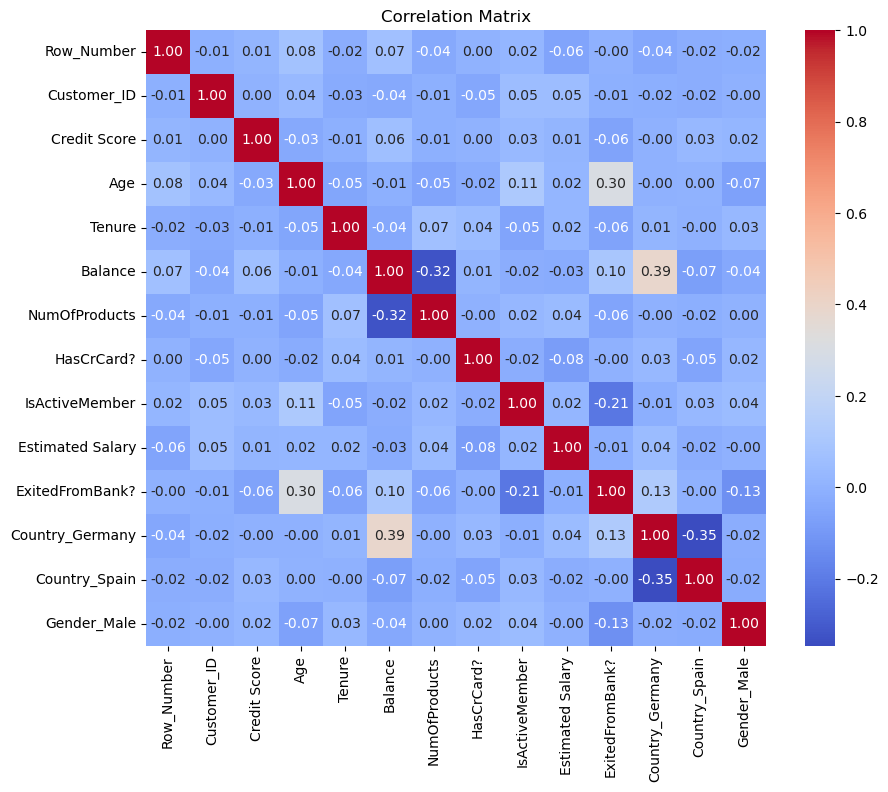

In [132]:
# The correlation matrix can also be visualized with a heatmap
correlation_matrix = df_pig.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Top 5 variables with the strongest correlations (in order from strongest to weakest) are:
### Age: Has a positive correlation = the older a client is the higher the likelihood of leaving the bank.
### IsActiveMember: Has a negative correlation = clients who are active are less likely to leave the bank.
### Gender_Male: Has a negative correlation = males are less likely to leave the bank.
### Country_Germany: Has a positive correlation = clients in Germany are more likely to leave the bank.
### Balance: Has a positive correlation = higher balances increase the likelihood of leaving the bank.

# 6. Creating the Decision Tree

### Create the decision tree with the 5 variables determined from the analysis using the sklearn functions
### "Age" will be placed at the top of the tree since it has the strongest correlation with "ExitedFromBank?"

Accuracy: 0.8389261744966443


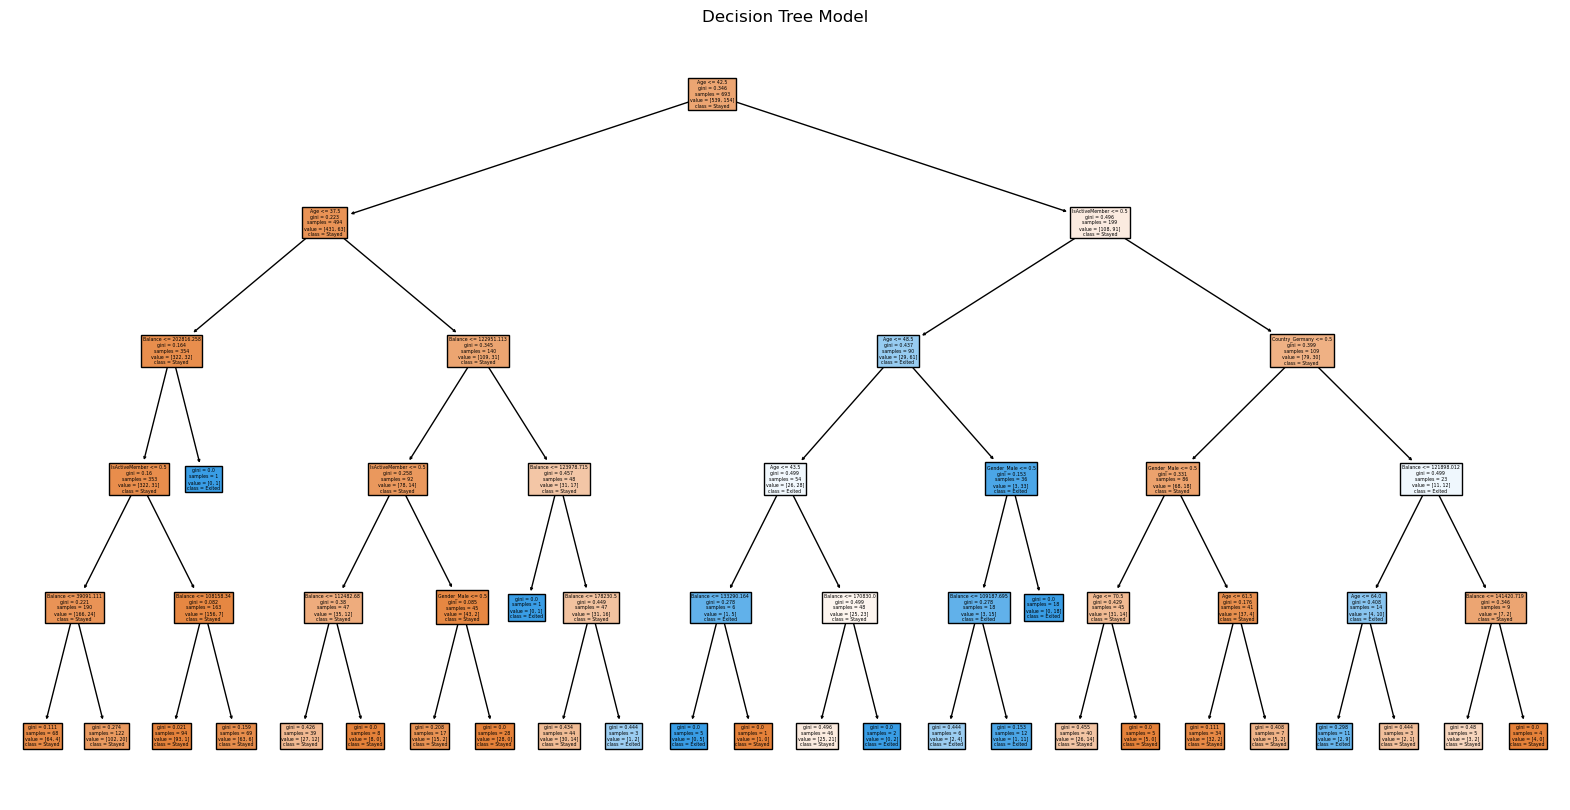

In [133]:
# Data preparation
X = df_pig[['Age', 'IsActiveMember', 'Gender_Male', 'Country_Germany', 'Balance']]
y = df_pig['ExitedFromBank?']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

# Initializing and training the Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=5, random_state=16)
tree.fit(X_train, y_train)

# Predicting on the test set and calculating accuracy
y_pred = tree.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Visualizing the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=['Age', 'IsActiveMember', 'Gender_Male', 'Country_Germany', 'Balance'], class_names=['Stayed', 'Exited'], filled=True)
plt.title('Decision Tree Model')
plt.show()

In [134]:
# Optimize the decision tree classifier using the Grid Search function with cross-validation

# Parameter grid
param_grid = {'max_depth': range(3, 10)}  # Test depths from 3 to 10

# Grid search with cross-validation
grid = GridSearchCV(DecisionTreeClassifier(random_state=16), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

# Evaluate on the test set
best_tree = grid.best_estimator_
y_pred = best_tree.predict(X_test)
print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))


Best parameters: {'max_depth': 3}
Best cross-validation score: 0.80
Test set accuracy: 0.82


In [135]:
# Check the importance of the variables from the best decision tree model
feature_importances = pd.DataFrame(best_tree.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                 importance
Age                0.633990
IsActiveMember     0.246185
Balance            0.065233
Country_Germany    0.054592
Gender_Male        0.000000


### The decision tree model can now be refined based on insights from optimization and importance evaluations.

Accuracy: 0.8355704697986577


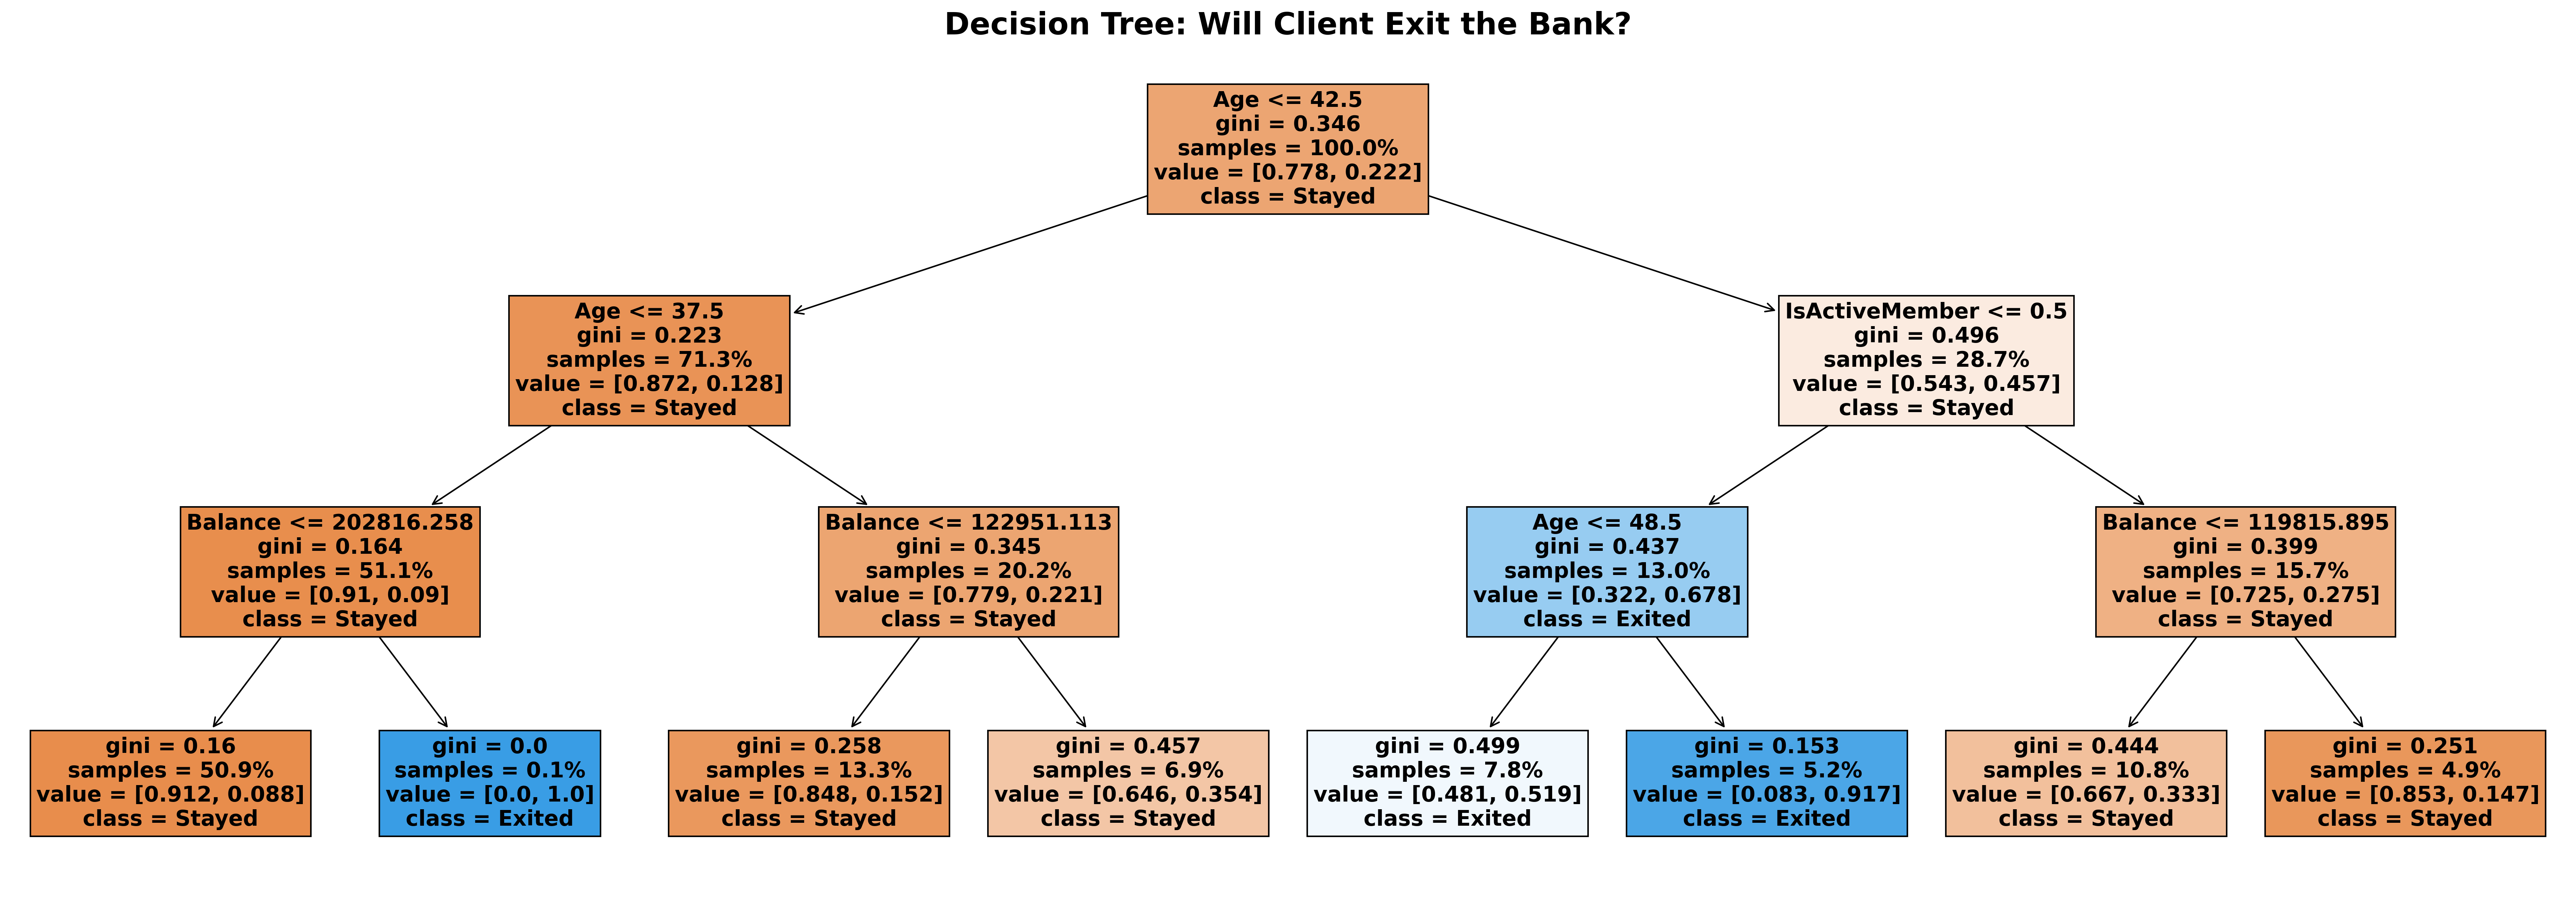

In [136]:
# Data Preparation
X = df_pig[['Age', 'IsActiveMember', 'Balance']]
y = df_pig['ExitedFromBank?']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

# Initializing and training the Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=3, random_state=16)
tree.fit(X_train, y_train)

# Predicting on the test set and calculating accuracy
y_pred = tree.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Visualizing the updated decision tree with figure adjustments for improved readability
plt.figure(figsize=(30,10), dpi=300)
tree_plot = plot_tree(tree, feature_names=['Age', 'IsActiveMember', 'Balance'], class_names=['Stayed', 'Exited'], filled=True, fontsize=14, proportion=True)
for text in tree_plot:
    text.set_fontweight('bold')
plt.title('Decision Tree: Will Client Exit the Bank?', fontsize=20, fontweight='bold')
exited_bank_decision_tree = plt.gcf()
plt.show()

### The refined decision tree model has an accuracy of 83.6% for predicting if a client will leave the bank based on the information available.

In [137]:
# Export the decision tree visualization as a png file
exited_bank_decision_tree.savefig(os.path.join(path, 'Visualizations', 'exited_bank_decision_tree.png'))

# 7. Exporting the Datasets

### Export the final datasets as an Excel files

In [138]:
# Final check of the "left_pig" dataframe before exporting
print(left_pig.head())
print(left_pig.info())
left_pig.shape

   Row_Number Customer_ID  Credit Score  Country  Gender   Age  Tenure  \
0           1    15634602         619.0   France  Female  42.0       2   
2           3    15619304         502.0   France  Female  42.0       8   
5           6    15574012         645.0    Spain    Male  44.0       8   
7           8    15656148         376.0  Germany  Female  29.0       4   
16         17    15737452         653.0  Germany    Male  58.0       1   

      Balance  NumOfProducts  HasCrCard?  IsActiveMember  Estimated Salary  \
0        0.00              1           1               1         101348.88   
2   159660.80              3           1               0         113931.57   
5   113755.78              2           1               0         149756.71   
7   115046.74              4           1               0         119346.88   
16  132602.88              1           1               0           5097.67   

    ExitedFromBank?  
0                 1  
2                 1  
5                 1 

(204, 13)

In [139]:
# Export the "left_pig" dataframe to Excel
left_pig.to_excel(os.path.join(path, 'Data', 'left_pig_dataset.xlsx'))

In [140]:
# Final check of the "stayed_pig" dataframe before exporting
print(stayed_pig.head())
print(stayed_pig.info())
stayed_pig.shape

  Row_Number Customer_ID  Credit Score Country  Gender   Age  Tenure  \
1          2    15647311         608.0   Spain  Female  41.0       1   
3          4    15701354         699.0  France  Female  39.0       1   
4          5    15737888         850.0   Spain  Female  43.0       2   
6          7    15592531         822.0  France    Male  50.0       7   
8          9    15792365         501.0  France    Male  44.0       4   

     Balance  NumOfProducts  HasCrCard?  IsActiveMember  Estimated Salary  \
1   83807.86              1           0               1         112542.58   
3       0.00              2           0               0          93826.63   
4  125510.82              1           1               1          79084.10   
6       0.00              2           1               1          10062.80   
8  142051.07              2           0               1          74940.50   

   ExitedFromBank?  
1                0  
3                0  
4                0  
6                0  

(787, 13)

In [141]:
# Export the "stayed_pig" dataframe to Excel
stayed_pig.to_excel(os.path.join(path, 'Data', 'stayed_pig_dataset.xlsx'))

In [142]:
# Final check of the "df_pig" dataframe before exporting
print(df_pig.head())
print(df_pig.info())
df_pig.shape

  Row_Number Customer_ID  Credit Score   Age  Tenure    Balance  \
0          1    15634602         619.0  42.0       2       0.00   
1          2    15647311         608.0  41.0       1   83807.86   
2          3    15619304         502.0  42.0       8  159660.80   
3          4    15701354         699.0  39.0       1       0.00   
4          5    15737888         850.0  43.0       2  125510.82   

   NumOfProducts  HasCrCard?  IsActiveMember  Estimated Salary  \
0              1           1               1         101348.88   
1              1           0               1         112542.58   
2              3           1               0         113931.57   
3              2           0               0          93826.63   
4              1           1               1          79084.10   

   ExitedFromBank?  Country_Germany  Country_Spain  Gender_Male  
0                1            False          False        False  
1                0            False           True        False  
2 

(991, 14)

In [143]:
# Export the cleaned and processed dataframe
df_pig.to_excel(os.path.join(path, 'Data', 'cleaned_pig_dataset.xlsx'))